In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **1. Mean Absolute Error (MAE)**  
- **Definition:**  
  MAE measures the average of the absolute differences between predicted values (\( \hat{y} \)) and actual values (\( y \)):  
  \[
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  \]  
- **Characteristics:**  
  - MAE is less sensitive to outliers because it uses absolute differences.  
  - Provides a straightforward interpretation of the average error in the same units as the data.  

- **Use Cases:**  
  - When all errors are equally important.  
  - Ideal for problems where interpretability in the same unit as the data is needed (e.g., sales prediction errors).  

---

#### **2. Mean Squared Error (MSE)**  
- **Definition:**  
  MSE calculates the average of the squared differences between predicted and actual values:  
  \[
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  \]  
- **Characteristics:**  
  - Penalizes larger errors more than smaller ones due to squaring.  
  - Emphasizes the impact of outliers.  
  - Units are squared relative to the original data.  

- **Use Cases:**  
  - When penalizing larger errors is crucial (e.g., financial forecasts where large deviations are costly).  
  - Used in regression tasks where the focus is on minimizing variance in predictions.  

---

#### **3. Root Mean Squared Error (RMSE)**  
- **Definition:**  
  RMSE is the square root of MSE, giving error values in the same unit as the data:  
  \[
  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  \]  
- **Characteristics:**  
  - Retains the characteristics of MSE but returns values in the original unit.  
  - Easier to interpret than MSE because it aligns with the data scale.  

- **Use Cases:**  
  - When both penalizing large errors and interpretability in the original unit are important.  
  - Popular in forecasting and regression evaluations (e.g., weather predictions, stock market analysis).  

---

### **Differences Between MAE, MSE, and RMSE**

| Metric   | Formula                        | Sensitivity to Outliers | Units                  | Key Strength                        | Key Weakness                          |
|----------|--------------------------------|--------------------------|------------------------|-------------------------------------|---------------------------------------|
| **MAE**  | \( \frac{1}{n} \sum |y - \hat{y}| \) | Low                      | Same as original data | Easy to interpret, robust to outliers | May not emphasize large deviations     |
| **MSE**  | \( \frac{1}{n} \sum (y - \hat{y})^2 \) | High                     | Squared data units    | Penalizes large deviations         | Harder to interpret due to units       |
| **RMSE** | \( \sqrt{\frac{1}{n} \sum (y - \hat{y})^2} \) | High                     | Same as original data | Balances penalizing deviations and interpretability | Sensitive to outliers                  |

---

### **Choosing Between Them**
- **MAE:** Best when all errors should have the same weight, and interpretability is crucial.  
- **MSE:** Ideal when emphasizing larger errors is important, even at the cost of interpretability.  
- **RMSE:** Suitable when both penalizing larger errors and maintaining interpretability in original units are priorities.  

Let me know if you want to see code examples for these metrics!

## Definitions of of MAE, MSE, and RMSE  

In [2]:
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
      mae += abs(i-ref)
      c += 1
    return mae / c
    
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
      mse += (i-ref)**2
      c += 1
    return mse / c

def rmse(data, ref):
    return (mse(data, ref))**(1/2)

**Create random sample data**

In [3]:
num_sets = 1000
num_points = 1000

# Generates x sets with y data points each
data = np.random.normal(100, 20, (num_sets, num_points))

**Helper function for creating noisy data and plotting the charts**

In [4]:
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Sample random "num_ouliers" points for each set
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Lists to keep the metrics for all original sets
    mae_original = []
    mse_original = []
    rmse_original = []
    # Lists to keep the metrics for all noisy sets
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # For each observation set, evaluates all three distances to the mean of the set
    for i in range(data.shape[0]):
        # Recovers the observations
        observations = data[i]
        # Create a noisy verion of the data with the randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases, to prevent it from shifting and altering the result.
        set_mean = np.mean(observations)
        
        # Evaluate the metrics
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))
        rmse_original.append(rmse(observations, set_mean))
        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))
        rmse_noisy.append(rmse(observations_noisy, set_mean))
        
    # Plots all
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = True, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = True)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = True, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = True)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = True, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = True)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax2.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()

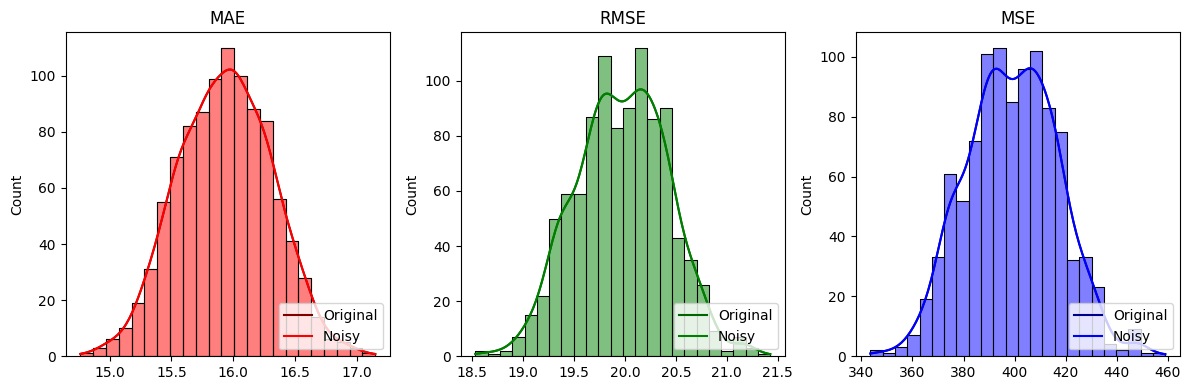

In [5]:
evaluate_metrics(data, num_outliers=0, amplitude_outliers=1)

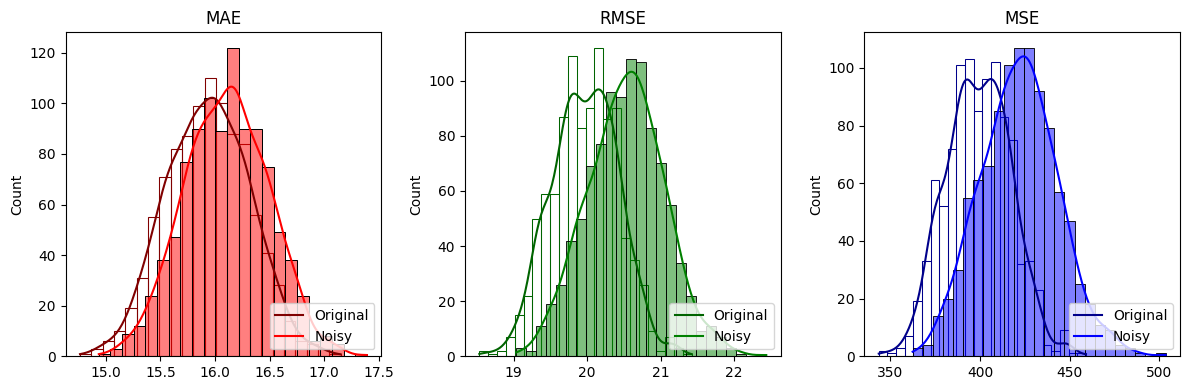

In [6]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=2)

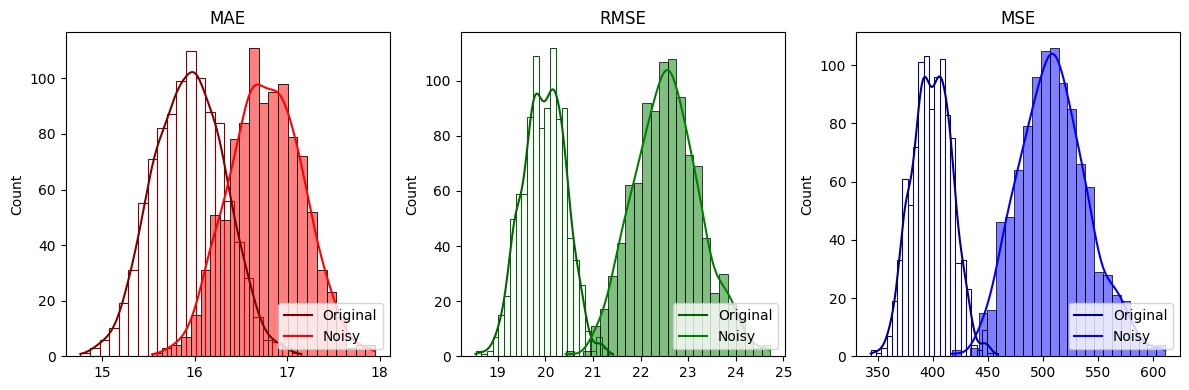

In [7]:
evaluate_metrics(data, num_outliers=10, amplitude_outliers=2)

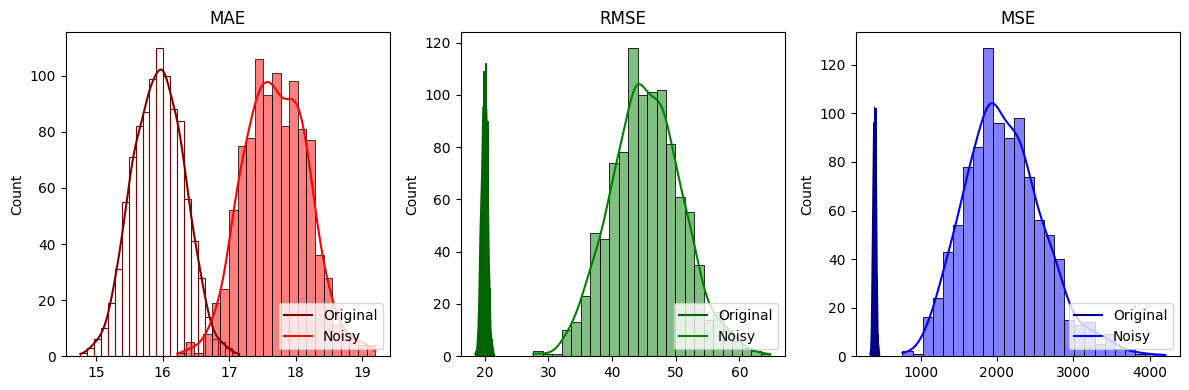

In [8]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=10)

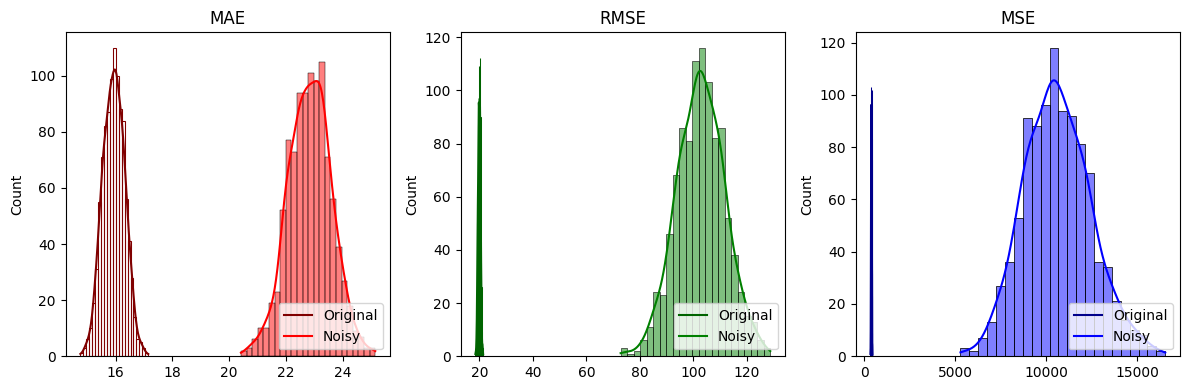

In [9]:
evaluate_metrics(data, num_outliers=5, amplitude_outliers=15)